# ANN for Image Classification

## Imports

In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.16.2'

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preprocessing

In [6]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [7]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [8]:
x_train.shape , x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
y_train.shape , y_test.shape

((60000,), (10000,))

In [10]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
(np.max(x_train), np.min(x_train))

(255, 0)

In [12]:
(np.max(y_train), np.min(y_train))

(9, 0)

In [13]:
class_names = ['0 Top', '1 Trouser', '2 Pullover', '3 Dress',
               '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker',
               '8 Bag', '9 Ankle boot']

In [14]:
class_names

['0 Top',
 '1 Trouser',
 '2 Pullover',
 '3 Dress',
 '4 Coat',
 '5 Sandal',
 '6 Shirt',
 '7 Sneaker',
 '8 Bag',
 '9 Ankle boot']

## EDA

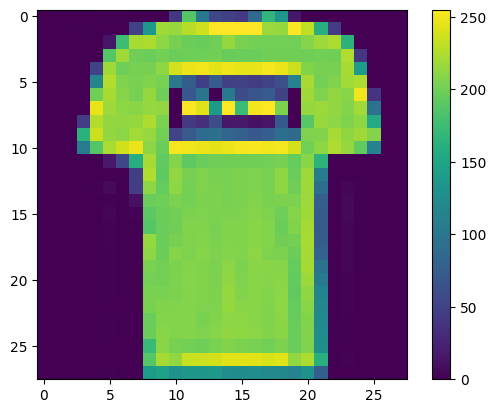

In [15]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [16]:
y_train[1], class_names[y_train[1]]

(0, '0 Top')

In [17]:
# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

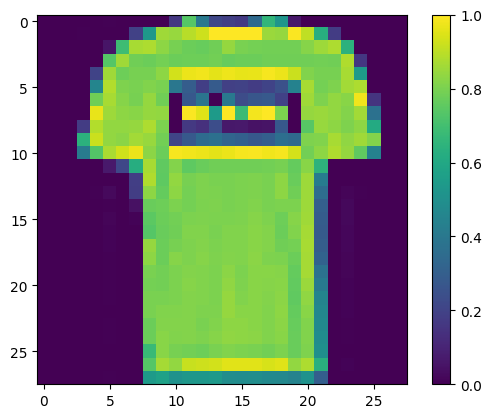

In [18]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [19]:
# Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [21]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## Building the Model

In [22]:
model = tf.keras.models.Sequential()

In [23]:
# adding first fully connected hidden layer
# 1) units of neurons = 128
# 2) activation function = relu
# 3) input shape = 784

model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))

/Users/farzam/Desktop/IT/ml/practice/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-12 21:43:26.483994: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-12 21:43:26.484024: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-12 21:43:26.484029: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-12 21:43:26.484048: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-12 21:43:26.484058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_fact

In [24]:
# Adding the second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization technique, prevents overfitting

In [25]:
# Adding the output layer
# 1) units of neurons = 10
# 2) activation function = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Training the model

In [26]:
# Compiling the model
# 1) Optimizer = adam, (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy, (acts as guide to optimizer)
# 3) metrics = sparse_catagorical_accuracy

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2025-05-12 21:43:27.128916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.8508 - sparse_categorical_accuracy: 0.7097
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5532 - sparse_categorical_accuracy: 0.8120
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5287 - sparse_categorical_accuracy: 0.8160
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5502 - sparse_categorical_accuracy: 0.8155
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5399 - sparse_categorical_accuracy: 0.8183
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5546 - sparse_categorical_accuracy: 0.8143
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5504 - sparse_categorical_accuracy: 0.8133
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5688 - sparse_categorical_accuracy: 0.8135
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.5842 - sparse_categorical_accuracy: 0.8084
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━

## Model Evaluation and Prediction

In [29]:
# model evaluation
total_loss, total_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4906 - sparse_categorical_accuracy: 0.8319


In [30]:
# model prediction
probabilities = model.predict(x_test)
y_pred = np.argmax(probabilities, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [32]:
y_pred[0], y_test[0]

(9, 9)

In [33]:
# confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [34]:
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print('\n')
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print('\n')
print(classification_report(y_pred=y_pred, y_true=y_test))

[[783   2   9  58   7   2 117   0  22   0]
 [  4 951  10  25   5   0   3   0   2   0]
 [ 17   4 587  12 191   1 176   0  12   0]
 [ 24  15   6 883  10   1  56   0   5   0]
 [  0   1  73  47 697   0 172   0  10   0]
 [  0   0   0   1   0 932   0  44   1  22]
 [141   1  70  65  85   0 602   0  36   0]
 [  0   0   0   0   0  33   0 955   0  12]
 [  2   1   0   4   6   5  17   5 960   0]
 [  0   0   0   0   0  15   0  78   1 906]]


0.8256


              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       0.98      0.95      0.96      1000
           2       0.78      0.59      0.67      1000
           3       0.81      0.88      0.84      1000
           4       0.70      0.70      0.70      1000
           5       0.94      0.93      0.94      1000
           6       0.53      0.60      0.56      1000
           7       0.88      0.95      0.92      1000
           8       0.92      0.96      0.94      1000
           9     